**Note:-** 
*all the markdown in italic format are for our understanding of tasks completed and what we did in them.*

**Note:-**
**all the markdown in bold are for main headings.**

**IMPORT AND SETUP**

In [1]:
#importing required libraries
import os #for input output operations
import pandas as pd #for dataframe operations
import numpy as np 
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns #for Data Visualization for interactive images
from collections import Counter
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression #ML algorithm
from sklearn.model_selection import train_test_split #splitting dataset
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pprint import pprint
from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [2]:
os.chdir(r"C:\Users\jaina\Downloads\edu-versity advanced-intern-projects\Cab_Fare_Prediction")
print(os.getcwd())

C:\Users\jaina\Downloads\edu-versity advanced-intern-projects\Cab_Fare_Prediction


In [3]:
train = pd.read_csv("train/train_cab.csv")
test = pd.read_csv("test_cab.csv")

In [4]:
train

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
55423851,2014-03-15 03:28:00.00000070,14.0,2014-03-15 03:28:00 UTC,-74.005272,40.740027,-73.963280,40.762555,1
55423852,2009-03-24 20:46:20.0000002,4.2,2009-03-24 20:46:20 UTC,-73.957784,40.765530,-73.951640,40.773959,1
55423853,2011-04-02 22:04:24.0000004,14.1,2011-04-02 22:04:24 UTC,-73.970505,40.752325,-73.960537,40.797342,1
55423854,2011-10-26 05:57:51.0000002,28.9,2011-10-26 05:57:51 UTC,-73.980901,40.764629,-73.870605,40.773963,1


In [5]:
test

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51 UTC,-73.968124,40.796997,-73.955643,40.780388,6
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51 UTC,-73.945511,40.803600,-73.960213,40.776371,6
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15 UTC,-73.991600,40.726608,-73.789742,40.647011,6
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19 UTC,-73.985573,40.735432,-73.939178,40.801731,6


**UNDERSTANDING THE DATA**

In [6]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [7]:
train.tail()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
55423851,2014-03-15 03:28:00.00000070,14.0,2014-03-15 03:28:00 UTC,-74.005272,40.740027,-73.963280,40.762555,1
55423852,2009-03-24 20:46:20.0000002,4.2,2009-03-24 20:46:20 UTC,-73.957784,40.765530,-73.951640,40.773959,1
55423853,2011-04-02 22:04:24.0000004,14.1,2011-04-02 22:04:24 UTC,-73.970505,40.752325,-73.960537,40.797342,1
55423854,2011-10-26 05:57:51.0000002,28.9,2011-10-26 05:57:51 UTC,-73.980901,40.764629,-73.870605,40.773963,1
55423855,2014-12-12 11:33:00.00000015,7.5,2014-12-12 11:33:00 UTC,-73.969722,40.797668,-73.970885,40.783313,1


In [8]:
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [9]:
test.tail()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51 UTC,-73.968124,40.796997,-73.955643,40.780388,6
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51 UTC,-73.945511,40.803600,-73.960213,40.776371,6
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15 UTC,-73.991600,40.726608,-73.789742,40.647011,6
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19 UTC,-73.985573,40.735432,-73.939178,40.801731,6
9913,2015-01-18 14:06:23.0000006,2015-01-18 14:06:23 UTC,-73.988022,40.754070,-74.000282,40.759220,6


In [10]:
train.shape

(55423856, 8)

In [11]:
test.shape

(9914, 7)

In [12]:
train.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [13]:
test.dtypes

key                   object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [14]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5.542386e+07,5.542386e+07,5.542386e+07,5.542348e+07,5.542348e+07,5.542386e+07
mean,1.134505e+01,-7.250968e+01,3.991979e+01,-7.251121e+01,3.992068e+01,1.685380e+00
std,2.071083e+01,1.284888e+01,9.642353e+00,1.278220e+01,9.633346e+00,1.327664e+00
min,-3.000000e+02,-3.442060e+03,-3.492264e+03,-3.442025e+03,-3.547887e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073493e+01,-7.399140e+01,4.073403e+01,1.000000e+00
50%,8.500000e+00,-7.398180e+01,4.075265e+01,-7.398015e+01,4.075316e+01,1.000000e+00
75%,1.250000e+01,-7.396708e+01,4.076713e+01,-7.396367e+01,4.076810e+01,2.000000e+00
max,9.396336e+04,3.457626e+03,3.408790e+03,3.457622e+03,3.537133e+03,2.080000e+02


In [15]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


**DATA PREPROCESSING**

*Data Exploring And Missing Value Analysis*

In [16]:
#convert the fare_amount form object to numeric 
train["fare_amount"] = pd.to_numeric(train["fare_amount"], errors = "coerce")#Using errors='coerce'. It will replace all non-numeric values.

In [17]:
train.shape

(55423856, 8)

In [18]:
test.dropna(subset = ["pickup_datetime"])#Dropping NA values in datetime column

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51 UTC,-73.968124,40.796997,-73.955643,40.780388,6
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51 UTC,-73.945511,40.803600,-73.960213,40.776371,6
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15 UTC,-73.991600,40.726608,-73.789742,40.647011,6
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19 UTC,-73.985573,40.735432,-73.939178,40.801731,6


In [19]:
#here pickup_datetime variable is in object so we need to change its data type to datetime
train["pickup_datetime"] = pd.to_datetime(train["pickup_datetime"], format= "%Y-%m-%d %H:%M:%S UTC")

In [20]:
#seperating the pickup_dateitme column into individual seperate field like year, month, day of the week
train['year'] = train["pickup_datetime"].dt.year
train['Month'] = train["pickup_datetime"].dt.month
train['Date'] = train["pickup_datetime"].dt.day
train['Day'] = train["pickup_datetime"].dt.dayofweek
train['Hour'] = train["pickup_datetime"].dt.hour
train['Minute'] = train["pickup_datetime"].dt.minute

In [21]:
train.dtypes # Re-checking datatypes after conversion

key                          object
fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int32
Month                         int32
Date                          int32
Day                           int32
Hour                          int32
Minute                        int32
dtype: object

In [22]:
test["pickup_datetime"] = pd.to_datetime(test["pickup_datetime"], format= "%Y-%m-%d %H:%M:%S UTC")

In [23]:
test['year'] = test["pickup_datetime"].dt.year
test['Month'] = test["pickup_datetime"].dt.month
test['Date'] = test["pickup_datetime"].dt.day
test['Day'] = test["pickup_datetime"].dt.dayofweek
test['Hour'] = test["pickup_datetime"].dt.hour
test['Minute'] = test["pickup_datetime"].dt.minute

In [24]:
test.dtypes

key                          object
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int32
Month                         int32
Date                          int32
Day                           int32
Hour                          int32
Minute                        int32
dtype: object

In [25]:
#removing datetime missing value rows
train = train.drop(train[train["pickup_datetime"].isnull()].index, axis= 0)
print(train.shape)
print(train["pickup_datetime"].isnull().sum())

(55423856, 14)
0


In [26]:
train["passenger_count"].describe()

count    5.542386e+07
mean     1.685380e+00
std      1.327664e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      2.080000e+02
Name: passenger_count, dtype: float64

In [27]:
train = train.drop(train[train["passenger_count"] > 6].index, axis= 0)

In [28]:
train = train.drop(train[train["passenger_count"] == 0].index, axis= 0)

In [29]:
train["passenger_count"].describe()

count    5.522832e+07
mean     1.691092e+00
std      1.307210e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      6.000000e+00
Name: passenger_count, dtype: float64

In [30]:
train["passenger_count"].sort_values(ascending= True)

0           1
33616138    1
33616139    1
33616140    1
33616143    1
           ..
51195429    6
37993355    6
37993354    6
44846705    6
2309404     6
Name: passenger_count, Length: 55228324, dtype: int64

In [31]:
#removing missing values rows for passenger_count
train = train.drop(train[train["passenger_count"].isnull()].index, axis= 0)
print(train.shape)
print(train["passenger_count"].isnull().sum())

(55228324, 14)
0


In [32]:
#there is one value of 0.12 in passenger_count which is present and it is not possible and hence we remove it
train = train.drop(train[train["passenger_count"] == 0.12].index, axis= 0)
train.shape

(55228324, 14)

In [33]:
train["fare_amount"].sort_values(ascending=False)

41032263    93963.36
41186018    75747.02
18859340    61550.86
39374511     9000.41
22703574     3130.30
              ...   
50945357     -112.56
41872047     -145.00
34027417     -176.00
22663050     -300.00
51560795     -300.00
Name: fare_amount, Length: 55228324, dtype: float64

In [34]:
#Count the number of values where the fare amount is less than zero
Counter(train["fare_amount"]<0)

Counter({False: 55225871, True: 2453})

In [35]:
# 1. Remove missing fares
train = train.dropna(subset=["fare_amount"])

# 2. Remove zero & negative fares
train = train[train["fare_amount"] > 0]

# 3. Remove extreme outliers (top 1%)
upper_limit = train["fare_amount"].quantile(0.99)
train = train[train["fare_amount"] <= upper_limit]

# 4. Verify
print(train["fare_amount"].describe())
print("Zero fares:", (train["fare_amount"] == 0).sum())
print(train.shape)

count    5.467480e+07
mean     1.081921e+01
std      8.035407e+00
min      1.000000e-02
25%      6.000000e+00
50%      8.500000e+00
75%      1.250000e+01
max      5.300000e+01
Name: fare_amount, dtype: float64
Zero fares: 0
(54674801, 14)


In [36]:
train["fare_amount"].describe()

count    5.467480e+07
mean     1.081921e+01
std      8.035407e+00
min      1.000000e-02
25%      6.000000e+00
50%      8.500000e+00
75%      1.250000e+01
max      5.300000e+01
Name: fare_amount, dtype: float64

In [37]:
#latitudes range can be form -90 to 90 and longitudes can be form -180 to 180
#drop all the latitude values less than -90
train[train["pickup_latitude"] < -90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
150559,2012-08-03 07:43:00.000000176,25.3,2012-08-03 07:43:00,0.000000,-3116.285383,-73.953600,40.787998,1,2012,8,3,4,7,43
436233,2012-03-11 01:56:00.000000100,4.1,2012-03-11 01:56:00,-2986.242495,-880.627428,-3383.296608,-2559.748913,1,2012,3,11,6,1,56
543001,2011-10-28 13:53:00.000000178,5.3,2011-10-28 13:53:00,-3377.680935,-113.019497,-554.918693,314.794180,1,2011,10,28,4,13,53
1281413,2011-09-02 22:51:00.000000213,11.3,2011-09-02 22:51:00,-2256.421232,-1185.391185,-2256.421232,-1185.391185,1,2011,9,2,4,22,51
1340837,2011-06-09 10:39:00.000000137,10.1,2011-06-09 10:39:00,2434.238557,-3458.664702,-1281.933787,-104.637653,1,2011,6,9,3,10,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54609376,2011-09-21 17:23:00.000000196,11.7,2011-09-21 17:23:00,12.688030,-2474.452315,12.688030,-2474.452315,1,2011,9,21,2,17,23
54648545,2011-07-17 07:23:00.00000033,32.5,2011-07-17 07:23:00,-522.802712,-894.619958,2109.919930,840.584980,1,2011,7,17,6,7,23
54838293,2012-02-08 06:46:00.00000033,9.3,2012-02-08 06:46:00,1353.461692,-1168.630818,72.830738,-1172.795073,1,2012,2,8,2,6,46
55114105,2011-07-02 17:54:00.000000115,13.3,2011-07-02 17:54:00,-1305.734592,-778.582130,1196.891612,3359.841550,1,2011,7,2,5,17,54


In [38]:
#check the latitude values greater than 90
train[train["pickup_latitude"] > 90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
5686,2011-07-30 11:15:00.00000082,3.3,2011-07-30 11:15:00,-73.947235,401.083332,-73.951392,40.778927,1,2011,7,30,5,11,15
174356,2011-11-21 21:36:00.00000081,9.7,2011-11-21 21:36:00,2140.601160,1703.092772,-1251.195890,-1189.615440,1,2011,11,21,0,21,36
272439,2011-04-23 02:55:00.00000012,9.3,2011-04-23 02:55:00,-74.002497,405.350000,-73.978600,40.739962,1,2011,4,23,5,2,55
464025,2012-03-05 20:58:00.0000009,6.9,2012-03-05 20:58:00,-73.994268,404.966667,-73.973857,40.755457,1,2012,3,5,0,20,58
505229,2012-03-05 21:08:00.0000006,9.3,2012-03-05 21:08:00,-73.994268,404.966667,-73.986387,40.776895,1,2012,3,5,0,21,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54958232,2011-07-16 13:21:00.00000019,8.9,2011-07-16 13:21:00,-73.986165,405.133332,-73.993818,40.761572,3,2011,7,16,5,13,21
55055774,2012-04-26 23:18:00.00000095,23.7,2012-04-26 23:18:00,-73.977275,404.700000,-73.989475,40.684077,1,2012,4,26,3,23,18
55186918,2011-08-10 10:05:00.00000018,7.7,2011-08-10 10:05:00,-1267.942923,2165.889693,-2593.367637,1598.247970,1,2011,8,10,2,10,5
55383247,2011-11-10 23:25:00.000000223,2.5,2011-11-10 23:25:00,-2959.462187,2371.279908,770.672687,-774.447875,1,2011,11,10,3,23,25


In [39]:
#removing the out of range values for the latitude
train = train.drop(train[train["pickup_latitude"] < -90].index, axis= 0)
train = train.drop(train[train["pickup_latitude"] > 90].index, axis= 0)

In [40]:
print(train.shape)

(54673796, 14)


In [41]:
#check the longitude values less than -180
train[train["pickup_longitude"] < -180]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
60442,2012-01-12 13:36:00.000000186,4.9,2012-01-12 13:36:00,-736.550000,40.738230,-73.988742,40.748847,1,2012,1,12,3,13,36
217355,2012-06-03 23:21:00.00000077,6.1,2012-06-03 23:21:00,-740.000000,40.747620,0.000000,0.000000,6,2012,6,3,6,23,21
243342,2012-08-02 10:38:00.000000111,7.3,2012-08-02 10:38:00,-736.333333,40.766480,-73.987928,40.751742,3,2012,8,2,3,10,38
351119,2012-02-03 07:53:00.000000135,4.1,2012-02-03 07:53:00,-736.483332,40.766512,-73.981992,40.771672,1,2012,2,3,4,7,53
370663,2012-05-04 23:19:00.000000261,6.1,2012-05-04 23:19:00,-736.516667,40.719095,-74.003952,40.729860,1,2012,5,4,4,23,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55131851,2012-06-28 08:40:00.00000084,9.7,2012-06-28 08:40:00,-736.516667,40.730642,-74.008055,40.722475,1,2012,6,28,3,8,40
55140180,2012-09-03 18:24:00.00000039,6.1,2012-09-03 18:24:00,-735.466667,40.773677,0.000000,0.000000,1,2012,9,3,0,18,24
55236494,2012-07-12 14:57:00.000000147,14.1,2012-07-12 14:57:00,-734.633332,40.688300,-73.951830,40.723345,1,2012,7,12,3,14,57
55289327,2012-06-04 18:41:00.000000216,6.1,2012-06-04 18:41:00,-736.383332,40.755492,-73.987450,40.739705,1,2012,6,4,0,18,41


In [42]:
#check the latitude values greater than 180
train[train["pickup_longitude"] > 180]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
1632919,2010-08-10 18:19:45.0000001,7.3,2010-08-10 18:19:45,2814.475637,-66.919318,-2633.912142,3320.686797,1,2010,8,10,1,18,19
2955605,2013-04-09 08:54:00.000000218,6.0,2013-04-09 08:54:00,2228.722048,40.742078,0.000000,0.000000,1,2013,4,9,1,8,54
3249674,2011-09-02 14:38:00.00000011,23.7,2011-09-02 14:38:00,2228.738685,40.760237,-73.959787,40.713892,2,2011,9,2,4,14,38
5550637,2011-06-04 12:32:00.00000034,42.5,2011-06-04 12:32:00,833.386565,-2.595688,1707.203463,2980.782555,1,2011,6,4,5,12,32
6459317,2011-08-18 00:01:00.000000133,10.5,2011-08-18 00:01:00,757.866575,-80.926848,-554.935360,3351.403027,1,2011,8,18,3,0,1
11124540,2011-09-07 20:06:00.000000177,6.1,2011-09-07 20:06:00,1547.815547,-79.458763,1547.815547,-79.458763,1,2011,9,7,2,20,6
13374805,2011-09-07 22:42:00.000000125,17.3,2011-09-07 22:42:00,1547.815547,-79.458763,1547.815547,-79.458763,1,2011,9,7,2,22,42
13382354,2011-07-01 08:53:00.000000127,5.7,2011-07-01 08:53:00,1662.459703,-44.548278,402.768385,-402.454305,1,2011,7,1,4,8,53
17191788,2011-11-12 12:24:00.000000181,6.5,2011-11-12 12:24:00,2130.827885,-73.898090,2130.827885,-73.898090,1,2011,11,12,5,12,24
22928285,2011-10-06 07:31:00.00000045,8.1,2011-10-06 07:31:00,787.246387,-80.880182,787.246387,-80.880182,1,2011,10,6,3,7,31


In [43]:
#checking now for dropoff latitude and longitude
train[train["dropoff_latitude"] < -90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
579901,2013-08-14 20:23:00.000000245,18.00,2013-08-14 20:23:00,-73.999190,40.720200,-0.360000,-3114.338567,1,2013,8,14,2,20,23
1254291,2012-04-18 11:08:00.00000021,6.10,2012-04-18 11:08:00,-74.000640,40.728432,0.000000,-2515.672033,1,2012,4,18,2,11,8
1448456,2009-09-09 09:11:00.000000161,5.70,2009-09-09 09:11:00,-74.002892,40.728170,0.000000,-1353.533270,1,2009,9,9,2,9,11
1512218,2010-08-12 19:33:03.0000004,7.70,2010-08-12 19:33:03,-73.999023,40.744502,-73.983568,-2518.947010,1,2010,8,12,3,19,33
4774987,2012-08-13 10:55:00.00000036,4.10,2012-08-13 10:55:00,-73.971005,40.761808,0.000000,-3084.312325,1,2012,8,13,0,10,55
5824401,2011-02-27 15:50:00.00000040,6.10,2011-02-27 15:50:00,0.000000,0.000000,-73.985813,-1207.374633,1,2011,2,27,6,15,50
9873455,2012-05-18 12:12:00.000000119,10.50,2012-05-18 12:12:00,-73.960238,40.766940,0.000000,-3084.299123,1,2012,5,18,4,12,12
10037293,2011-12-16 10:30:00.000000154,4.10,2011-12-16 10:30:00,-73.956112,40.775910,-0.233333,-2475.718485,1,2011,12,16,4,10,30
11268542,2010-10-17 16:39:00.000000154,5.70,2010-10-17 16:39:00,-73.971760,40.799622,3133.218913,-2526.988633,1,2010,10,17,6,16,39
13242756,2012-12-05 19:15:00.000000177,9.00,2012-12-05 19:15:00,-73.966495,40.757377,0.000000,-2505.696550,2,2012,12,5,2,19,15


In [44]:
train[train["dropoff_latitude"] > 90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
92310,2011-09-27 11:54:00.000000127,28.9,2011-09-27 11:54:00,-74.014595,40.681880,-73.973310,404.616667,1,2011,9,27,1,11,54
181973,2012-01-03 09:04:00.000000130,6.5,2012-01-03 09:04:00,-74.008918,40.717827,-74.000855,404.133332,1,2012,1,3,1,9,4
335675,2012-02-26 00:25:00.00000085,19.3,2012-02-26 00:25:00,-74.006457,40.743865,-73.981283,404.133332,1,2012,2,26,6,0,25
561910,2010-08-14 03:42:59.0000001,4.5,2010-08-14 03:42:59,-73.977635,40.754687,-73.870432,405.650000,1,2010,8,14,5,3,42
582110,2012-05-02 14:20:00.000000131,30.5,2012-05-02 14:20:00,-73.870875,40.773792,-73.977790,404.716667,1,2012,5,2,2,14,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54783024,2011-11-17 16:52:00.000000108,4.5,2011-11-17 16:52:00,-1.100000,0.000000,0.000000,400.191755,1,2011,11,17,3,16,52
54789512,2011-12-30 14:09:00.000000191,49.8,2011-12-30 14:09:00,-74.003797,40.722282,-73.792223,409.233332,3,2011,12,30,4,14,9
54922095,2012-07-15 13:35:00.00000045,7.7,2012-07-15 13:35:00,-73.979492,40.784487,-73.966160,413.583332,3,2012,7,15,6,13,35
55256617,2012-06-15 20:20:00.00000088,4.5,2012-06-15 20:20:00,-74.005990,40.712027,-0.198333,474.007988,1,2012,6,15,4,20,20


In [45]:
train[train["dropoff_longitude"] < -180]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
269695,2012-05-24 09:00:00.000000101,17.7,2012-05-24 09:00:00,-73.997572,40.720945,-1329.621332,40.773717,1,2012,5,24,3,9,0
282374,2011-04-25 13:09:00.000000123,5.7,2011-04-25 13:09:00,-73.987105,40.755732,-732.600000,40.744832,1,2011,4,25,0,13,9
449263,2012-01-28 16:51:00.00000088,6.9,2012-01-28 16:51:00,-73.983142,40.741987,-736.500000,40.755255,1,2012,1,28,5,16,51
472273,2012-02-09 17:42:00.000000250,49.8,2012-02-09 17:42:00,-73.937167,40.758112,-736.083333,40.758112,6,2012,2,9,3,17,42
666352,2012-03-16 22:02:00.000000257,4.9,2012-03-16 22:02:00,-73.992605,40.726815,-472.266667,40.733332,1,2012,3,16,4,22,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55045348,2011-12-20 19:32:00.000000224,9.3,2011-12-20 19:32:00,-73.994782,40.744960,-736.583333,40.724530,1,2011,12,20,1,19,32
55156080,2013-08-12 18:10:00.000000144,8.0,2013-08-12 18:10:00,-73.984357,40.742775,-2216.325133,40.726382,1,2013,8,12,0,18,10
55194997,2012-06-17 13:02:00.00000084,4.5,2012-06-17 13:02:00,-73.991467,40.749787,-740.016667,40.749142,1,2012,6,17,6,13,2
55364552,2011-11-18 08:21:00.000000232,8.5,2011-11-18 08:21:00,-73.980002,40.770077,-731.516667,40.756565,2,2011,11,18,4,8,21


In [46]:
train[train["dropoff_longitude"] > 180]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
2303710,2011-08-25 16:03:00.000000122,8.5,2011-08-25 16:03:00,-73.969230,40.762733,1328.726180,40.751985,6,2011,8,25,3,16,3
2630470,2011-07-01 16:19:00.0000003,5.3,2011-07-01 16:19:00,-2970.873547,-78.095678,420.931837,-36.151422,1,2011,7,1,4,16,19
5550637,2011-06-04 12:32:00.00000034,42.5,2011-06-04 12:32:00,833.386565,-2.595688,1707.203463,2980.782555,1,2011,6,4,5,12,32
11124540,2011-09-07 20:06:00.000000177,6.1,2011-09-07 20:06:00,1547.815547,-79.458763,1547.815547,-79.458763,1,2011,9,7,2,20,6
11268542,2010-10-17 16:39:00.000000154,5.7,2010-10-17 16:39:00,-73.971760,40.799622,3133.218913,-2526.988633,1,2010,10,17,6,16,39
12862004,2012-04-16 08:18:00.000000172,7.7,2012-04-16 08:18:00,-73.985230,40.734918,2051.037653,0.000000,1,2012,4,16,0,8,18
13374805,2011-09-07 22:42:00.000000125,17.3,2011-09-07 22:42:00,1547.815547,-79.458763,1547.815547,-79.458763,1,2011,9,7,2,22,42
13382354,2011-07-01 08:53:00.000000127,5.7,2011-07-01 08:53:00,1662.459703,-44.548278,402.768385,-402.454305,1,2011,7,1,4,8,53
16544211,2011-09-29 22:49:00.000000246,3.7,2011-09-29 22:49:00,-2565.407577,25.391038,2480.345402,-2164.037885,1,2011,9,29,3,22,49
17191788,2011-11-12 12:24:00.000000181,6.5,2011-11-12 12:24:00,2130.827885,-73.898090,2130.827885,-73.898090,1,2011,11,12,5,12,24


In [47]:
train.shape

(54673796, 14)

In [48]:
train.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

In [49]:
test.isnull().sum()

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

*Data preprocessing is complete*


**NOW WE CALCULATE THE DISTANCE USING HAVERISNE FORMULA**

In [50]:
#we have been given pickup latitudes and longitudes and dropofff latitude and longitude
#so we need to calculate the distance using the haversine formula and we will create a new variable called distance
from math import radians, cos, sin, asin, sqrt
def haversine(a):
    lon1 = a.iloc[0]
    lat1 = a.iloc[1]
    lon2 = a.iloc[2]
    lat2 = a.iloc[3]

    "Calculating the great circle distance between two points on the earth(specified in decimal degrees)"

    #convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    #haversine Formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371 * c
    return km

In [51]:
train["distance"] = train[["pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude"]].apply(haversine, axis=1)

In [52]:
test["distance"] = test[["pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude"]].apply(haversine, axis=1)

In [53]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17,26,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16,52,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,35,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4,30,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7,51,1.999157


In [54]:
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,2.323260
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,2.425353
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.618628
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.961033
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,5.387301


In [55]:
train.nunique()

key                  54673795
fare_amount              3608
pickup_datetime      25825503
pickup_longitude       334275
pickup_latitude        343447
dropoff_longitude      409562
dropoff_latitude       432374
passenger_count             6
year                        7
Month                      12
Date                       31
Day                         7
Hour                       24
Minute                     60
distance             53090979
dtype: int64

In [56]:
test.nunique()

key                  9914
pickup_datetime      1753
pickup_longitude     9125
pickup_latitude      9247
dropoff_longitude    9142
dropoff_latitude     9360
passenger_count         6
year                    7
Month                  12
Date                   31
Day                     7
Hour                   24
Minute                 60
distance             9830
dtype: int64

In [57]:
#checking outliers in the distance column
train["distance"].sort_values(ascending=False)

37736625    19688.800562
39253546    17873.415000
23460793    17558.572888
39462853    16986.879633
6459317     16924.070804
                ...     
18392876        0.000000
42760397        0.000000
2882416         0.000000
47499276        0.000000
9122786         0.000000
Name: distance, Length: 54673796, dtype: float64

In [58]:
train[train["distance"] > 8000]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
472,2009-02-22 22:48:00.000000130,2.5,2009-02-22 22:48:00,0.000000,0.000000,-74.005433,40.726685,2,2009,2,22,6,22,48,8667.304968
1260,2011-03-10 20:25:00.00000049,5.7,2011-03-10 20:25:00,-73.973907,40.754743,0.000000,0.000000,2,2011,3,10,3,20,25,8665.268588
2397,2012-06-24 17:11:10.0000001,45.0,2012-06-24 17:11:10,0.000000,0.000000,-74.010230,40.714553,2,2012,6,24,6,17,11,8667.454421
4278,2015-04-07 23:33:02.0000005,7.0,2015-04-07 23:33:02,-73.972702,40.757423,0.000000,0.000000,1,2015,4,7,1,23,33,8665.223767
4597,2010-03-30 07:12:00.000000158,6.9,2010-03-30 07:12:00,0.000000,0.000000,-73.989693,40.754280,1,2010,3,30,1,7,12,8666.566030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55418675,2013-09-06 22:21:39.0000002,6.0,2013-09-06 22:21:39,-73.994068,40.751000,0.000000,0.000000,1,2013,9,6,4,22,21,8666.861117
55419724,2014-07-22 10:55:41.0000002,2.5,2014-07-22 10:55:41,-73.982214,40.774927,0.000000,0.000000,1,2014,7,22,1,10,55,8666.369824
55420264,2011-05-11 13:00:33.0000005,16.1,2011-05-11 13:00:33,0.000000,0.000000,-74.004399,40.724368,1,2011,5,11,2,13,0,8667.171935
55420714,2012-11-14 18:45:00.000000138,12.0,2012-11-14 18:45:00,-73.950167,40.779780,0.000000,0.000000,1,2012,11,14,2,18,45,8663.817240


In [59]:
#We will remove the rows whose distance values is very high which is more than 129kms
train = train.drop(train[train["distance"] > 130].index, axis= 0)
train.shape

(54565799, 15)

In [60]:
Counter(train["distance"] == 0)

Counter({False: 53016169, True: 1549630})

In [61]:
Counter(test["distance"] == 0)

Counter({False: 9829, True: 85})

In [62]:
# drop zero-distance trips (memory efficient)
train = train[train["distance"] > 0]
train.shape

(53016169, 15)

In [63]:
##we need to drop all the distance values which are equal to 0
test = test.drop(test[test["distance"] == 0].index, axis= 0)
test.shape

(9829, 14)

*We have splitted the pickup_datetime into year, month, day, hour and minute so pickup_datetime would be irrelevant so we will be dropping it. We have already calculated the distance using pickup and dropoff latitude and longitude, hence we will be dropping of all those variables*

In [64]:
train

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17,26,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16,52,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,35,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4,30,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7,51,1.999157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55423851,2014-03-15 03:28:00.00000070,14.0,2014-03-15 03:28:00,-74.005272,40.740027,-73.963280,40.762555,1,2014,3,15,5,3,28,4.334397
55423852,2009-03-24 20:46:20.0000002,4.2,2009-03-24 20:46:20,-73.957784,40.765530,-73.951640,40.773959,1,2009,3,24,1,20,46,1.070590
55423853,2011-04-02 22:04:24.0000004,14.1,2011-04-02 22:04:24,-73.970505,40.752325,-73.960537,40.797342,1,2011,4,2,5,22,4,5.075548
55423854,2011-10-26 05:57:51.0000002,28.9,2011-10-26 05:57:51,-73.980901,40.764629,-73.870605,40.773963,1,2011,10,26,2,5,57,9.346157


In [65]:
drop_columns = ["pickup_datetime", "pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude", "Minute"]
train = train.drop(drop_columns, axis= 1) # axis=0 tell us to drop data row-wise whereas, axis=1 tells us to drop data column-wise

In [66]:
train.head()

,key,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
0,2009-06-15 17:26:21.0000001,4.5,1,2009,6,15,0,17,1.030764
1,2010-01-05 16:52:16.0000002,16.9,1,2010,1,5,1,16,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2,2011,8,18,3,0,1.389525
3,2012-04-21 04:30:42.0000001,7.7,1,2012,4,21,5,4,2.799270
4,2010-03-09 07:51:00.000000135,5.3,1,2010,3,9,1,7,1.999157


In [67]:
train.dtypes

key                 object
fare_amount        float64
passenger_count      int64
year                 int32
Month                int32
Date                 int32
Day                  int32
Hour                 int32
distance           float64
dtype: object

In [68]:
test.dtypes

key                          object
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int32
Month                         int32
Date                          int32
Day                           int32
Hour                          int32
Minute                        int32
distance                    float64
dtype: object

In [69]:
drop_columns = ["pickup_datetime", "pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude", "Minute"]
test = test.drop(drop_columns, axis= 1) # axis=0 tell us to drop data row-wise whereas, axis=1 tells us to drop data column-wise

In [70]:
test.dtypes

key                 object
passenger_count      int64
year                 int32
Month                int32
Date                 int32
Day                  int32
Hour                 int32
distance           float64
dtype: object

In [71]:
#converting my int32 to int64 for better conversion and modularity
train["year"] = train["year"].astype('int64')
train["Month"] = train["Month"].astype('int64')
train["Date"] = train["Date"].astype('int64')
train["Day"] = train["Day"].astype('int64')
train["Hour"] = train["Hour"].astype('int64')

In [72]:
train.dtypes

key                 object
fare_amount        float64
passenger_count      int64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

In [73]:
#converting my int32 to int64 for better conversion and modularity
test["year"] = test["year"].astype('int64')
test["Month"] = test["Month"].astype('int64')
test["Date"] = test["Date"].astype('int64')
test["Day"] = test["Day"].astype('int64')
test["Hour"] = test["Hour"].astype('int64')

In [74]:
test.dtypes

key                 object
passenger_count      int64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

In [75]:
passenger_counts = train["passenger_count"].value_counts().sort_index()
passenger_counts

passenger_count
1    36802915
2     7847776
3     2336729
4     1131560
5     3770677
6     1126512
Name: count, dtype: int64

**Data Visualization**

*Visualization we are going to follow:*

1. Number of passengers affecting the cab fare  
2. Pickup date and time affecting the cab fare  
3. Day of the week affecting the cab fare  
4. Distance affecting the cab fare


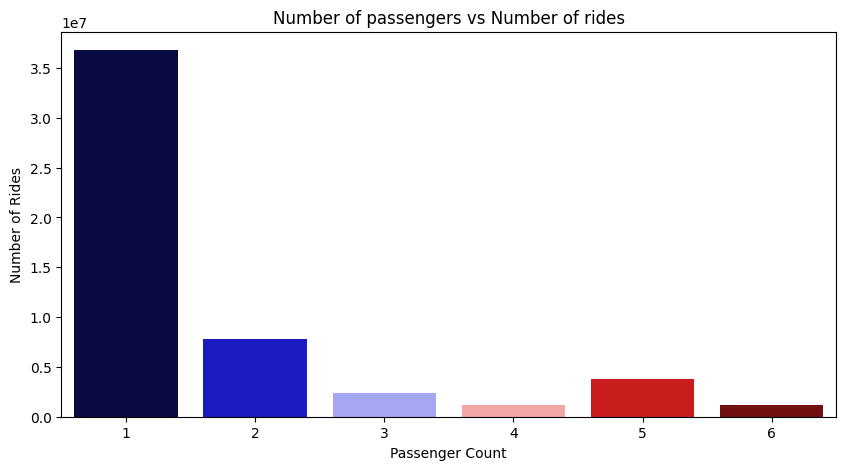

In [76]:
plt.figure(figsize=(10,5))
sns.barplot(
    x=passenger_counts.index,
    y=passenger_counts.values,
    hue=passenger_counts.index,   # assign hue
    palette="seismic",
    legend=False
)

plt.title("Number of passengers vs Number of rides", fontsize=12)
plt.xlabel("Passenger Count", fontsize=10)
plt.ylabel("Number of Rides", fontsize=10)
plt.show()

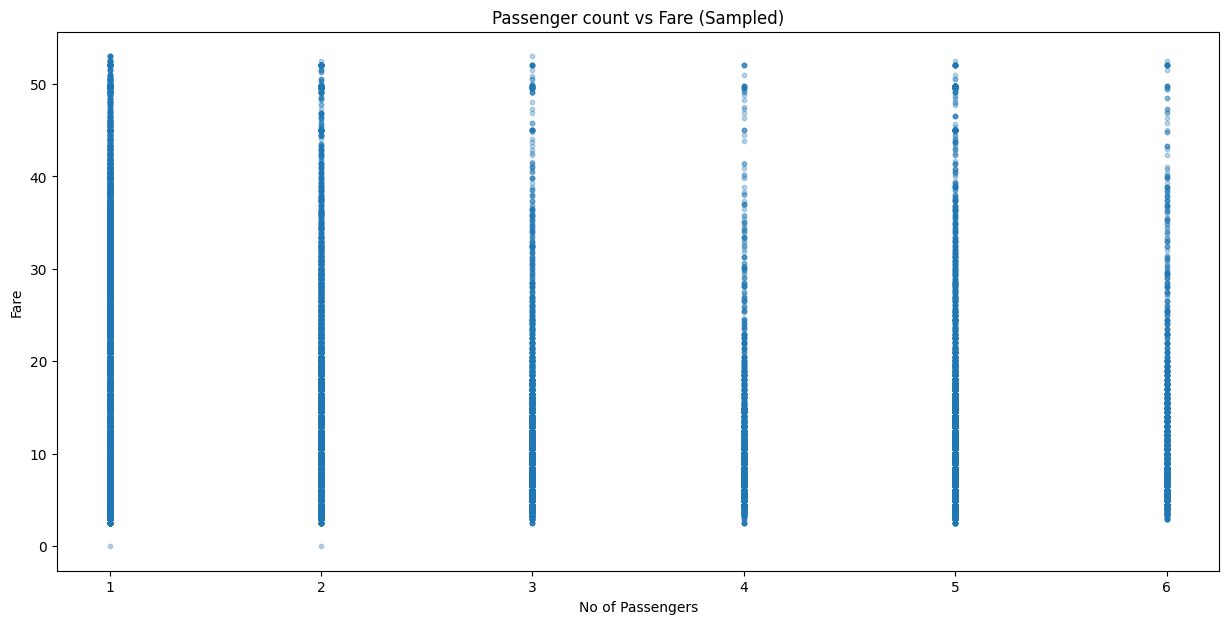

In [77]:
sample = train.sample(100_000, random_state=42)
plt.figure(figsize=(15,7))
plt.scatter(
    x=sample['passenger_count'],
    y=sample['fare_amount'],
    s=10,
    alpha=0.3
)
plt.xlabel("No of Passengers")
plt.ylabel("Fare")
plt.title("Passenger count vs Fare (Sampled)")
plt.show()

*to resolve the issue for date where we get error for .dt for datetime in plotting graph*

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# ===============================
# 1. FORCE Date → datetime
# ===============================
train['Date'] = pd.to_datetime(
    train['Date'],
    errors='coerce',
    unit='s'   # change to 'ms' if your numbers look too big
)

# ===============================
# 2. DROP INVALID DATES
# ===============================
train = train.dropna(subset=['Date'])

# ===============================
# 3. VERIFY (THIS MUST SHOW datetime64)
# ===============================
print(train['Date'].dtype)

datetime64[ns]


In [79]:
train['Date'].head(10)

0   1970-01-01 00:00:15
1   1970-01-01 00:00:05
2   1970-01-01 00:00:18
3   1970-01-01 00:00:21
4   1970-01-01 00:00:09
5   1970-01-01 00:00:06
6   1970-01-01 00:00:20
7   1970-01-01 00:00:04
8   1970-01-01 00:00:03
9   1970-01-01 00:00:02
Name: Date, dtype: datetime64[ns]

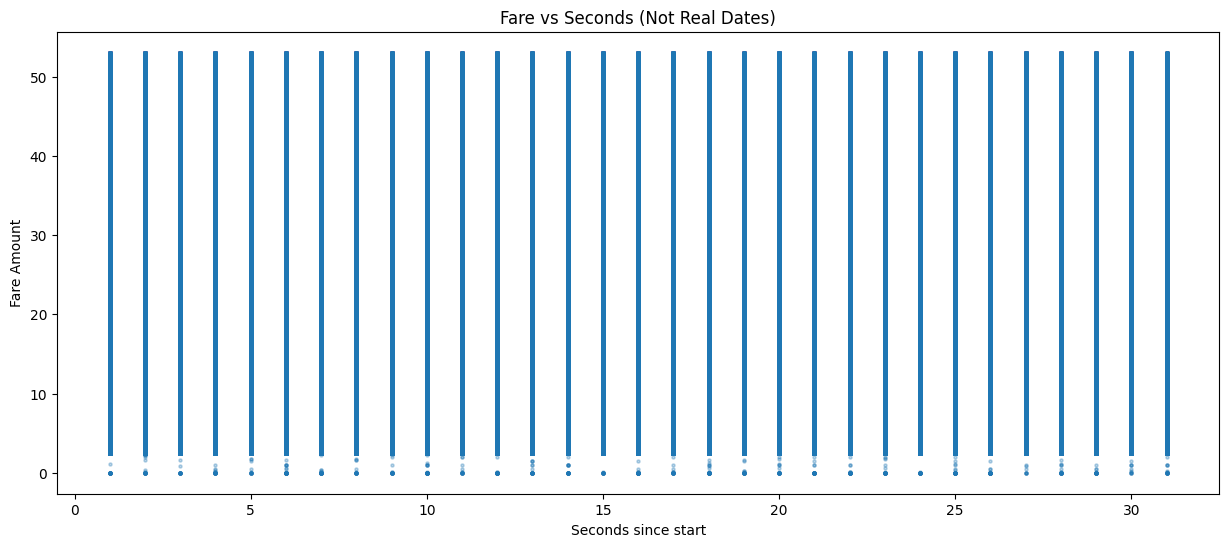

In [80]:
date_fare = (
    train
    .groupby(train['Date'].dt.date)['fare_amount']
    .mean()
)
plt.figure(figsize=(15,6))
plt.scatter(train['Date'].dt.second, train['fare_amount'], s=5, alpha=0.3)
plt.xlabel("Seconds since start")
plt.ylabel("Fare Amount")
plt.title("Fare vs Seconds (Not Real Dates)")
plt.show()

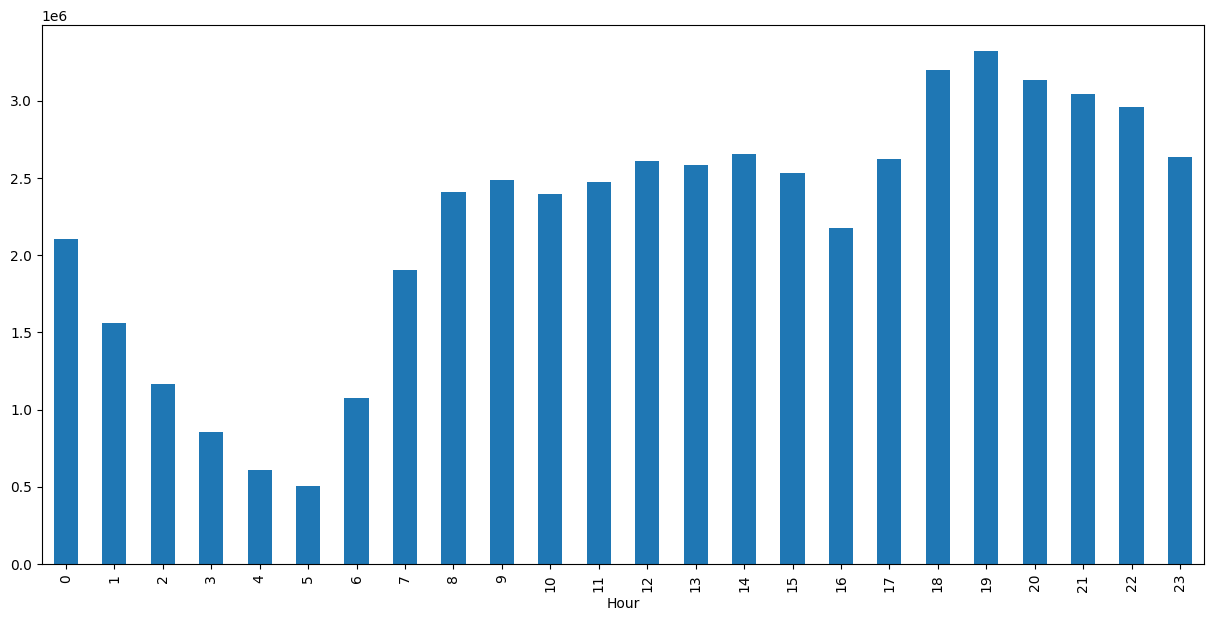

In [81]:
#relationship between the hour of the day and fare
plt.figure(figsize=(15, 7))
train.groupby(train["Hour"])["Hour"].count().plot(kind= "bar")
plt.show()

*Lowest number of cabs were at around 5AM and highest number of cabs were between 6PM and 7PM.*

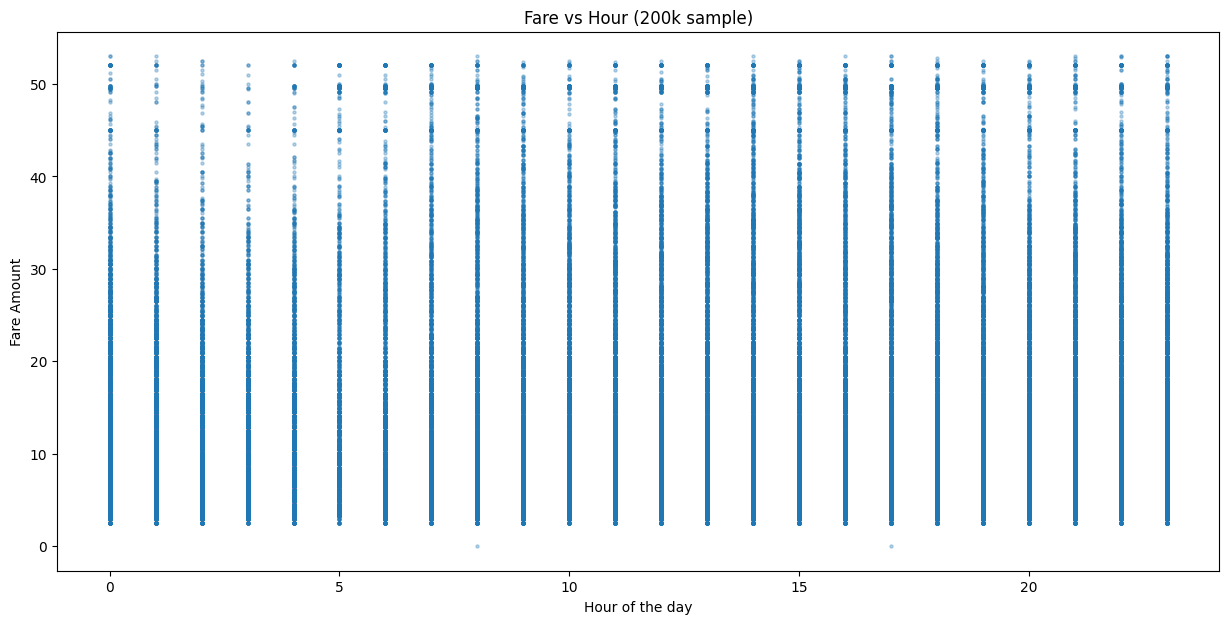

In [82]:
sample = train.sample(n=200_000, random_state=42)

plt.figure(figsize=(15,7))
plt.scatter(
    sample['Hour'],
    sample['fare_amount'],
    s=5,
    alpha=0.3
)
plt.xlabel("Hour of the day")
plt.ylabel("Fare Amount")
plt.title("Fare vs Hour (200k sample)")
plt.show()

*Fares are lowest during early morning off-peak hours (3–6 AM) and highest during evening rush hours (6–9 PM), indicating strong demand-driven pricing.*

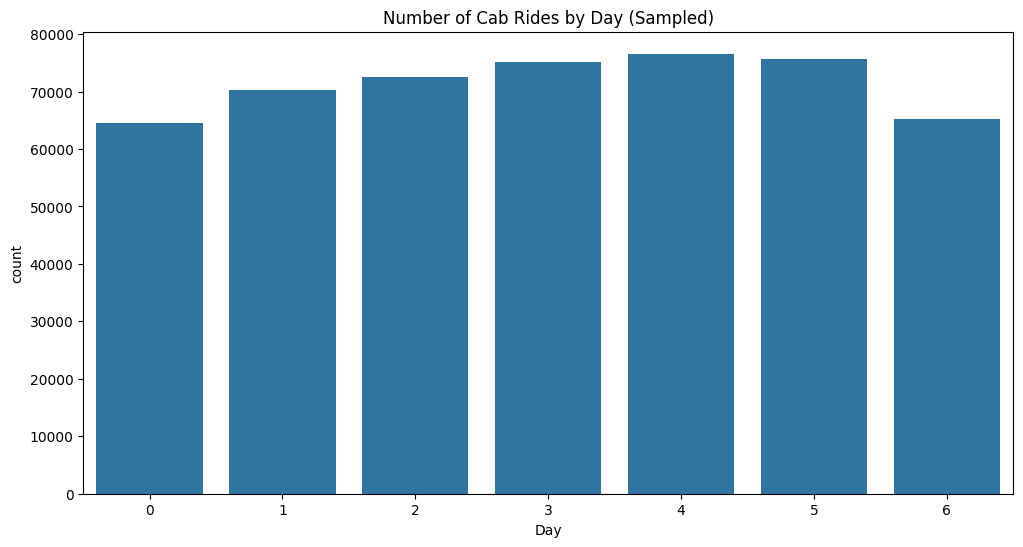

In [83]:
#relationship between the Day of the week and number of cab riders
sample = train.sample(n=500_000, random_state=42)
plt.figure(figsize=(12,6))
sns.countplot(x="Day", data=sample)
plt.title("Number of Cab Rides by Day (Sampled)")
plt.show()

*Number of cab rides are highest during Day3 to day 5 i.e (Wed-Fri) with highest rides being on Thursday(Day 4) and lowest cab rides being on Sunday(Day 0) and Saturday(Day 6) i.e during weekdays.*

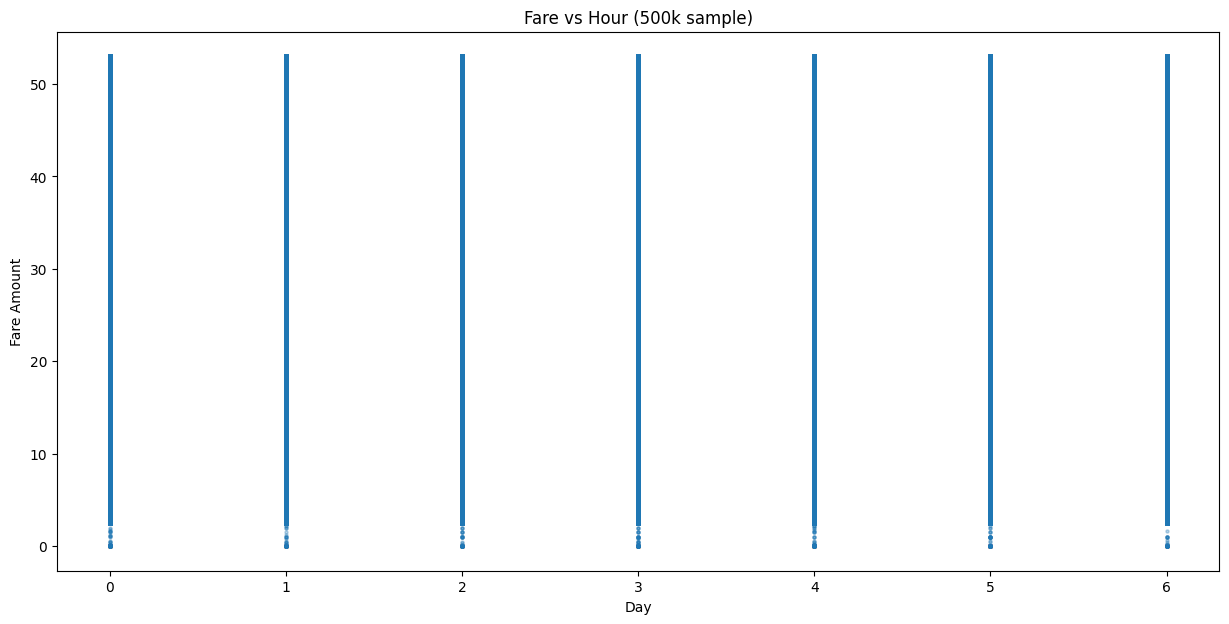

In [84]:
plt.figure(figsize=(15,7))
plt.scatter(
    x=train['Day'],
    y=train['fare_amount'],
    s=5,
    alpha=0.3
)
plt.xlabel("Day")
plt.ylabel("Fare Amount")
plt.title("Fare vs Hour (500k sample)")
plt.show()

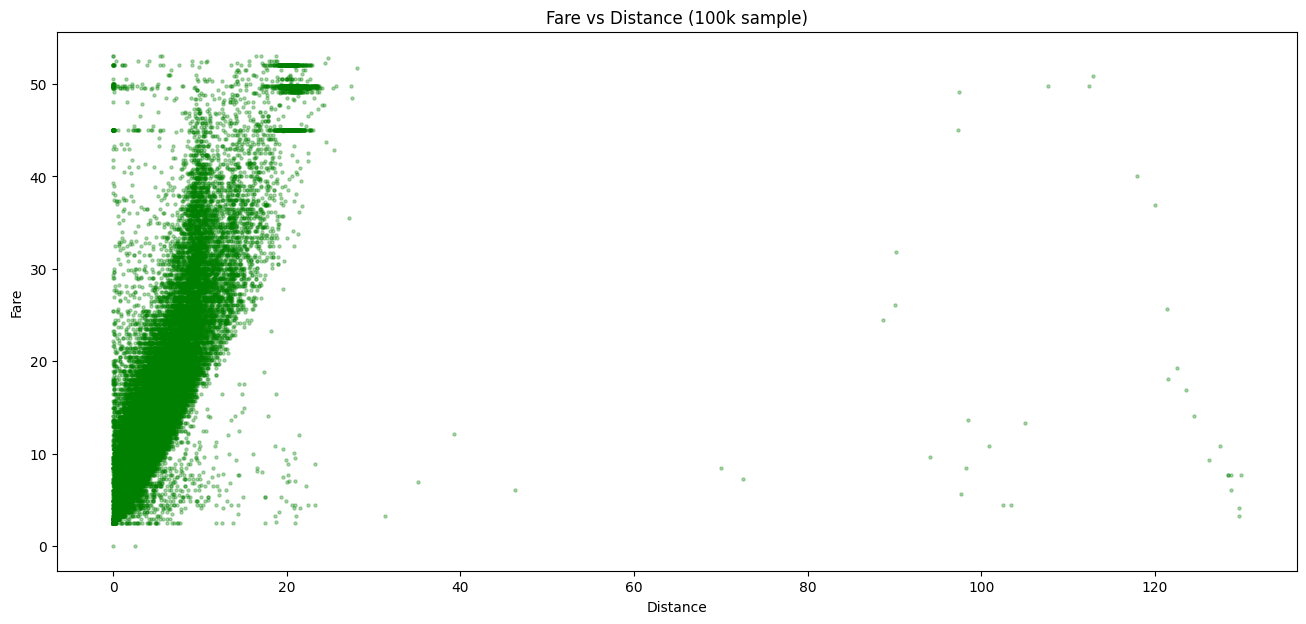

In [85]:
#relationship between distance and fare
# Downsample 100k rows for plotting
sample = train.sample(n=100_000, random_state=42)

plt.figure(figsize=(16,7))
plt.scatter(
    sample["distance"], 
    sample["fare_amount"], 
    s=5,        # smaller points
    alpha=0.3,  # transparency to see overlapping points
    c="g"
)
plt.xlabel("Distance")
plt.ylabel("Fare")
plt.title("Fare vs Distance (100k sample)")
plt.show()

*Distance is showing inversely proportional to fare charged as the distance is increasing the fare charge is increasing. The relationship between distance and fare is positive but noisy, particularly at shorter distances where minimum fare rules, traffic, and waiting time introduce variability.*

**Feature Scaling**

fare_amount


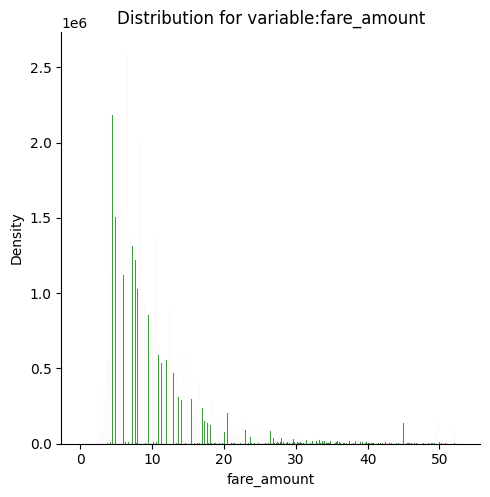

distance


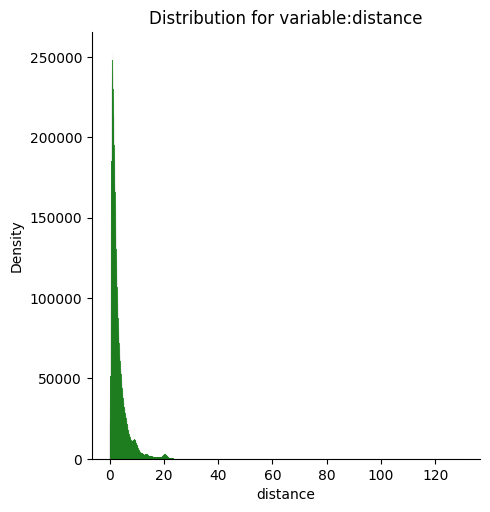

In [86]:
#Normality check for the training data for cab fare and distance
for i in ["fare_amount", "distance"]:
    print(i)
    sns.displot(train[i], bins= "auto", color="green")
    plt.title("Distribution for variable:" + i)
    plt.ylabel("Density")
    plt.show()    

In [87]:
#since the fare amount is high and positive skewed(right skewed) we will apply log transformation
train["fare_amount"]= np.log1p(train["fare_amount"])

#since the variable distance is high and strongly positive skewed(right skewed) we will apply log transformation
train["distance"]= np.log1p(train["distance"])

fare_amount


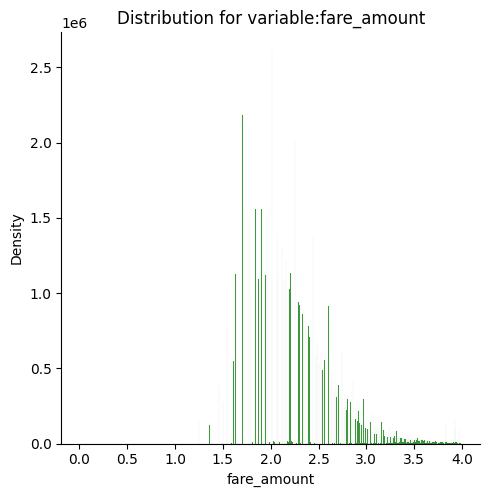

distance


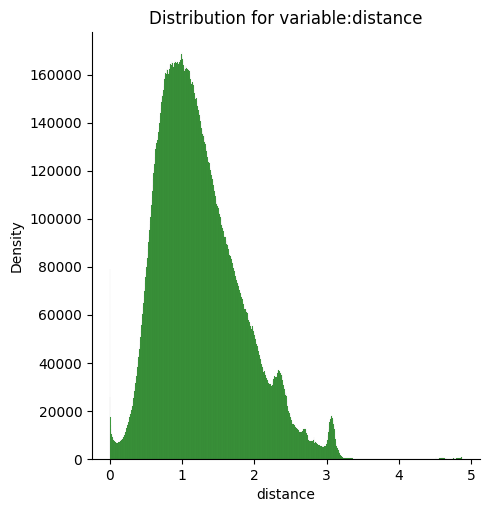

In [88]:
#Normality check for the training data for cab fare and distance
for i in ["fare_amount", "distance"]:
    print(i)
    sns.displot(train[i], bins= "auto", color="green")
    plt.title("Distribution for variable:" + i)
    plt.ylabel("Density")
    plt.show()    

distance


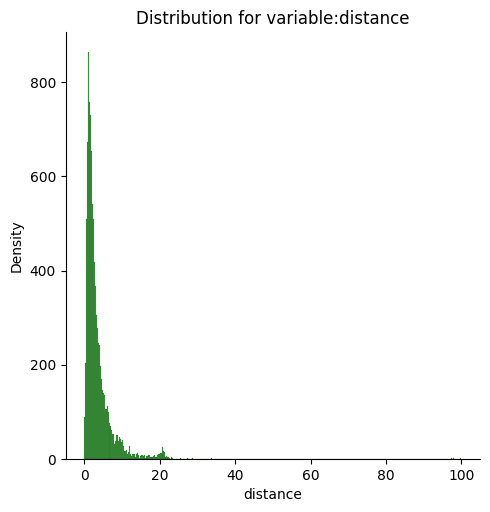

In [89]:
#Normality check for the test data for cab fare and distance
for i in ["distance"]:
    print(i)
    sns.displot(test[i], bins= "auto", color="green")
    plt.title("Distribution for variable:" + i)
    plt.ylabel("Density")
    plt.show()  

In [90]:
#since the variable distance is high and strongly positive skewed(right skewed) we will apply log transformation
test["distance"]= np.log1p(test["distance"])

distance


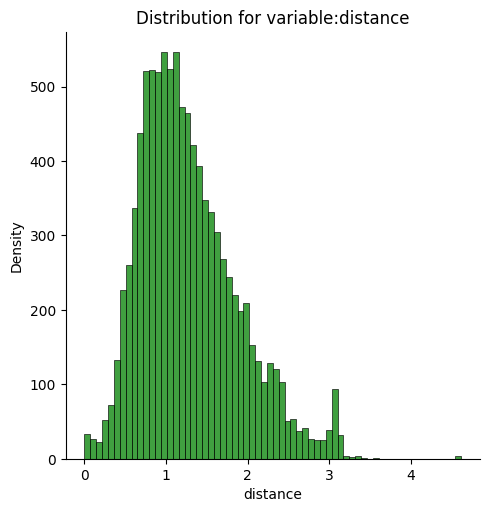

In [91]:
#Normality check for the test data for cab fare and distance
for i in ["distance"]:
    print(i)
    sns.displot(test[i], bins= "auto", color="green")
    plt.title("Distribution for variable:" + i)
    plt.ylabel("Density")
    plt.show()  

*After applying the log transformation the high skewed data has already been converted into a normal distribution, so there is no need for normlaization and standardization. We have already got the bell curve.*

**Data Modelling-Applying ML Algorithms**

In [92]:
#train test split for further modelling
X_train, X_test, y_train, y_test= train_test_split(train.iloc[:, train.columns != "fare_amount"],
                        train.iloc[:, 0], test_size= 0.20, random_state= 1)#in this we have taken all the columns except fare_amount and in train.iloc[:] signifies rows and train.iloc[;, 0]-0 signifies index column.

In [93]:
X_train

,key,passenger_count,year,Month,Date,Day,Hour,distance
19346203,2012-07-10 09:22:12.0000001,1,2012,7,1970-01-01 00:00:10,1,9,1.641625
11616985,2014-03-30 11:35:58.0000004,1,2014,3,1970-01-01 00:00:30,6,11,0.713023
35394124,2009-07-08 13:36:00.000000114,1,2009,7,1970-01-01 00:00:08,2,13,0.997611
20009173,2013-07-15 11:15:31.0000001,2,2013,7,1970-01-01 00:00:15,0,11,0.918652
16567864,2014-06-19 13:51:40.0000002,1,2014,6,1970-01-01 00:00:19,3,13,0.745918
...,...,...,...,...,...,...,...,...
14028854,2011-08-07 03:50:00.00000076,2,2011,8,1970-01-01 00:00:07,6,3,1.121935
513449,2010-02-21 08:35:00.00000025,1,2010,2,1970-01-01 00:00:21,6,8,0.805839
47964360,2011-12-11 22:38:00.000000161,1,2011,12,1970-01-01 00:00:11,6,22,2.729571
7069648,2009-01-13 09:52:00.000000196,1,2009,1,1970-01-01 00:00:13,1,9,1.940900


In [94]:
y_train

19346203      2012-07-10 09:22:12.0000001
11616985      2014-03-30 11:35:58.0000004
35394124    2009-07-08 13:36:00.000000114
20009173      2013-07-15 11:15:31.0000001
16567864      2014-06-19 13:51:40.0000002
                        ...              
14028854     2011-08-07 03:50:00.00000076
513449       2010-02-21 08:35:00.00000025
47964360    2011-12-11 22:38:00.000000161
7069648     2009-01-13 09:52:00.000000196
48366670    2013-08-23 13:42:00.000000113
Name: key, Length: 42412935, dtype: object

In [95]:
print(X_train.shape)
print(X_test.shape)

(42412935, 8)
(10603234, 8)


In [96]:
print(y_train.shape)
print(y_test.shape)

(42412935,)
(10603234,)


In [97]:
type(y_train)

pandas.core.series.Series

**1.Linear Regression-ML Algorithm**

In [118]:
X_train.dtypes

passenger_count    float32
year               float32
Month              float32
Day                float32
Hour               float32
distance           float32
dtype: object

In [119]:
X_train = X_train.drop(columns=["Date"], errors="ignore")
X_test  = X_test.drop(columns=["Date"], errors="ignore")

In [120]:
print(X_train.index)
print(type(X_train.index))

RangeIndex(start=0, stop=42412935, step=1)
<class 'pandas.core.indexes.range.RangeIndex'>


In [121]:
X_train = X_train.reset_index(drop=True)
X_test  = X_test.reset_index(drop=True)

In [125]:
X_train.select_dtypes(include=["object"]).head()

""
0
1
2
3
4


In [123]:
X_train = X_train.drop(columns=["key"], errors="ignore")
X_test  = X_test.drop(columns=["key"], errors="ignore")

In [128]:
print(y_train.head())
print(y_train.dtype)

19346203      2012-07-10 09:22:12.0000001
11616985      2014-03-30 11:35:58.0000004
35394124    2009-07-08 13:36:00.000000114
20009173      2013-07-15 11:15:31.0000001
16567864      2014-06-19 13:51:40.0000002
Name: key, dtype: object
object


In [129]:
TARGET = "fare_amount"

In [130]:
y = train[TARGET].astype("float32")     # target ONLY
X = train.drop(columns=[TARGET])        # features ONLY

In [131]:
DROP_COLS = ["key", "Date"]
X = X.drop(columns=DROP_COLS, errors="ignore")

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [133]:
X_train = X_train.astype("float32")
X_test  = X_test.astype("float32")

In [134]:
assert y_train.dtype != "object", "Target y must be numeric"
assert X_train.select_dtypes(include="object").empty, "X contains non-numeric columns"

In [135]:
#building a model based on trained data
fit_LR = LinearRegression().fit(X_train, y_train)

In [136]:
#prediction on train data
pred_train_LR = fit_LR.predict(X_train)

In [137]:
#prediction on test data
pred_test_LR = fit_LR.predict(X_test)

In [138]:
#calcualting RMSE error for test data
RMSE_test_LR = np.sqrt(mean_squared_error(y_test, pred_test_LR))

#calcualting RMSE error for train data
RMSE_train_LR = np.sqrt(mean_squared_error(y_train, pred_train_LR))

In [139]:
print("The root mean squared error for Training data =" + str(RMSE_train_LR))
print("The root mean squared error for Test data =" + str(RMSE_test_LR))

The root mean squared error for Training data =0.24747077241907678
The root mean squared error for Test data =0.24728849073270479


In [140]:
#calculate R^2 for train data
from sklearn.metrics import r2_score
r2_score(y_train, pred_train_LR)

0.7706043124198914

In [141]:
#calculate R^2 test data
r2_score(y_test, pred_test_LR)

0.771085262298584

**2.Decision Tree Model-ML Algorithm**

In [142]:
fit_DT = DecisionTreeRegressor(max_depth= 2).fit(X_train, y_train)

In [143]:
#prediction on train data
pred_train_DT = fit_DT.predict(X_train)

#prediction on test data
pred_test_DT = fit_DT.predict(X_test)

In [144]:
#calcualting RMSE error for test data
RMSE_test_DT = np.sqrt(mean_squared_error(y_test, pred_test_DT))

#calcualting RMSE error for train data
RMSE_train_DT = np.sqrt(mean_squared_error(y_train, pred_train_DT))

In [145]:
print("The root mean squared error for Training data =" + str(RMSE_train_DT))
print("The root mean squared error for Test data =" + str(RMSE_test_DT))

The root mean squared error for Training data =0.27949940486823627
The root mean squared error for Test data =0.279454372263642


In [146]:
#calculate R^2 for train data
from sklearn.metrics import r2_score
r2_score(y_train, pred_train_DT)

0.7073830260963864

In [147]:
#calculate R^2 test data
r2_score(y_test, pred_test_DT)

0.7076603172977226

**3.Random Forest Model-ML Algorithm**

In [150]:
train_sample = train.sample(n=300_000, random_state=42)

X = train_sample.drop(columns=["fare_amount", "key", "Date"], errors="ignore")
y = train_sample["fare_amount"].astype("float32")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [154]:
fit_RF = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    n_jobs=-1,
    random_state=42
)
fit_RF.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [155]:
#prediction on train data
pred_train_RF = fit_RF.predict(X_train)

#prediction on test data
pred_test_RF = fit_RF.predict(X_test)

In [156]:
#calcualting RMSE error for test data
RMSE_test_RF = np.sqrt(mean_squared_error(y_test, pred_test_RF))

#calcualting RMSE error for train data
RMSE_train_RF = np.sqrt(mean_squared_error(y_train, pred_train_RF))

In [157]:
print("The root mean squared error for Training data =" + str(RMSE_train_RF))
print("The root mean squared error for Test data =" + str(RMSE_test_RF))

The root mean squared error for Training data =0.1796157549178249
The root mean squared error for Test data =0.2288738539824167


In [158]:
#calculate R^2 for train data
from sklearn.metrics import r2_score
r2_score(y_train, pred_train_RF)

0.8797416185451614

In [159]:
#calculate R^2 test data
r2_score(y_test, pred_test_RF)

0.8058392373516894

**4.Gradient Boosting-ML Algorithm**

In [160]:
fit_GB = GradientBoostingRegressor().fit(X_train, y_train)

In [161]:
#prediction on train data
pred_train_GB = fit_GB.predict(X_train)

#prediction on test data
pred_test_GB = fit_GB.predict(X_test)

In [162]:
#calcualting RMSE error for test data
RMSE_test_GB = np.sqrt(mean_squared_error(y_test, pred_test_GB))

#calcualting RMSE error for train data
RMSE_train_GB = np.sqrt(mean_squared_error(y_train, pred_train_GB))

In [163]:
print("The root mean squared error for Training data =" + str(RMSE_train_GB))
print("The root mean squared error for Test data =" + str(RMSE_test_GB))

The root mean squared error for Training data =0.22537309154171903
The root mean squared error for Test data =0.2281057712238509


In [164]:
#calculate R^2 for train data
from sklearn.metrics import r2_score
r2_score(y_train, pred_train_GB)

0.8106651225865611

In [165]:
#calculate R^2 test data
r2_score(y_test, pred_test_GB)

0.8071402273486286

**Parameter Tuning**

*RandomSearchCV Technique on Random Forest Model and Gradient Boosting Model*

In [176]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state= 42)
#Look at the parameters used by our current post
print("Parameters currently in use:\n")
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


**1.RandomSearchCV On Random Forest Model**

In [177]:
#Random Hyperparameter Grid
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [178]:
# RandomSearchCV on Random Forest Model
RRF = RandomForestRegressor(random_state= 0)
n_estimator= list(range(1, 20, 2))
depth = list(range(1, 100, 2))

#Create the Random Grid
rand_grid = {"n_estimators": n_estimator,
            "max_depth": depth}

randomcv_rf = RandomizedSearchCV(RRF, param_distributions= rand_grid, n_iter= 5, cv= 5, random_state= 0)
randomcv_rf = randomcv_rf.fit(X_train, y_train)
predictions_RRF = randomcv_rf.predict(X_test)

view_best_params_RRF = randomcv_rf.best_params_

best_model = randomcv_rf.best_estimator_

predictions_RRF = best_model.predict(X_test)

#R^2
RRF_r2= r2_score(y_test, predictions_RRF)

#RMSE
RRF_rmse = np.sqrt(mean_squared_error(y_test, predictions_RRF))

print("Random Search CV Random Forest Regressor Model Performance:")
print("Best Parameters = ", view_best_params_RRF)
print("R Squared = {:0.2}.".format(RRF_r2))
print("RMSE = ", RRF_rmse)

Random Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R Squared = 0.81.
RMSE =  0.22889423243730417


**2.RandomSearchCV On Gradient Boosting Model**

In [179]:
#Applying RandomSearchCV on Gradient Boosting Model
gb = GradientBoostingRegressor(random_state= 42)
from pprint import pprint
#Lok at parameters used by our current forest
print("Parameters currently in use:\n")
pprint(gb.get_params())

Parameters currently in use:

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [180]:
import warnings
from sklearn.exceptions import FitFailedWarning
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FitFailedWarning)

In [181]:
# RandomSearchCV on Gradient Boosting  Model
gb = GradientBoostingRegressor(random_state= 0)
n_estimator= list(range(1, 20, 2))
depth = list(range(1, 100, 2))

#Create the Random Grid
rand_grid = {"n_estimators": n_estimator,
            "max_depth": depth}

randomcv_gb = RandomizedSearchCV(gb, param_distributions= rand_grid, n_iter= 5, cv= 5, random_state= 0)
randomcv_GB = randomcv_gb.fit(X_train, y_train)
predictions_GB = randomcv_GB.predict(X_test)

view_best_params_GB = randomcv_GB.best_params_

best_model = randomcv_GB.best_estimator_

predictions_GB = best_model.predict(X_test)

#R^2
GB_r2= r2_score(y_test, predictions_GB)

#RMSE
GB_rmse = np.sqrt(mean_squared_error(y_test, predictions_GB))

print("Random Search CV Gradient Boosting Regressor Model Performance:")
print("Best Parameters = ", view_best_params_GB)
print("R Squared = {:0.2}.".format(GB_r2))
print("RMSE = ", GB_rmse)

Random Search CV Gradient Boosting Regressor Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R Squared = 0.77.
RMSE =  0.24695936807801983


**Parameeter Tuning**

*GridSearchCV on Random Forest Model and Gradient Boosting Model.*

**1.GridSearchCV on Random Forest Model**

In [182]:
# GridSearchCV on Random Forest Model
GRF = RandomForestRegressor(random_state= 0)
n_estimator= list(range(11, 20, 2))
depth = list(range(5, 15, 2))

#Create the grid_search 
grid_search = {"n_estimators": n_estimator,
            "max_depth": depth}

gridcv_rf = GridSearchCV(GRF, param_grid= grid_search, cv= 5)
gridcv_RF = gridcv_rf.fit(X_train, y_train)
predictions_GRF = gridcv_RF.predict(X_test)

view_best_params_GRF = gridcv_RF.best_params_

best_model = gridcv_RF.best_estimator_

predictions_GRF = best_model.predict(X_test)

#R^2
GRF_r2= r2_score(y_test, predictions_GRF)

#RMSE
GRF_rmse = np.sqrt(mean_squared_error(y_test, predictions_GRF))

print("Grid Search CV Random Forest Regressor Model Performance:")
print("Best Parameters = ", view_best_params_GRF)
print("R Squared = {:0.2}.".format(GRF_r2))
print("RMSE = ", GRF_rmse)

Grid Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'max_depth': 11, 'n_estimators': 19}
R Squared = 0.81.
RMSE =  0.22797520570991764


**2.GridSearchCV on Gradient Boosting Model**

In [183]:
# GridSearchCV on Gradient Boosting Model
GGB = GradientBoostingRegressor(random_state= 0)
n_estimator= list(range(11, 20, 2))
depth = list(range(5, 15, 2))

#Create the grid_search 
grid_search = {"n_estimators": n_estimator,
            "max_depth": depth}

gridcv_gb = GridSearchCV(GGB, param_grid= grid_search, cv= 5)
gridcv_GB = gridcv_gb.fit(X_train, y_train)
predictions_GGB = gridcv_GB.predict(X_test)

view_best_params_GGB = gridcv_GB.best_params_

best_model = gridcv_GB.best_estimator_  

predictions_GGB = best_model.predict(X_test)

#R^2
GGB_r2= r2_score(y_test, predictions_GGB)

#RMSE
GGB_rmse = np.sqrt(mean_squared_error(y_test, predictions_GGB))

print("Grid Search CV Gradient Boosting Regressor Model Performance:")
print("Best Parameters = ", view_best_params_GGB)
print("R Squared = {:0.2}.".format(GGB_r2))
print("RMSE = ", GGB_rmse)

Grid Search CV Gradient Boosting Regressor Model Performance:
Best Parameters =  {'max_depth': 9, 'n_estimators': 19}
R Squared = 0.79.
RMSE =  0.23565056281080532


**Prediciton Of Fare Based On The Provided Test Dataset**

In [185]:
test = test[X_train.columns]

In [186]:
#Grid Search Cross Validation For Random Forest Model
regr = RandomForestRegressor(random_state= 0)
n_estimator = list(range(11, 20, 2))
depth = list(range(5, 15, 2))

#creating the grid
grid_search = {"n_estimators": n_estimator,
              "max_depth": depth}

#Grid Search Cross Validation for 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid= grid_search, cv = 5)
gridcv_RF = gridcv_rf.fit(X_train, y_train)

view_best_params_GRF = gridcv_RF.best_params_

#Applying model on test data
predictions_GRF_test = gridcv_RF.predict(test)

In [187]:
predictions_GRF_test

array([2.41326063, 2.40882196, 1.70957428, ..., 3.81888638, 3.11993384,
       2.01349406])

**Adding the results of the predicted fare model in the test data**

In [191]:
test = test.copy()
test["Predicted_Fare"] = predictions_GRF_test

In [192]:
test.head()

,passenger_count,year,Month,Day,Hour,distance,Predicted_Fare
0,1,2015,1,1,13,1.200946,2.413261
1,1,2015,1,1,13,1.231205,2.408822
2,1,2011,10,5,11,0.481579,1.709574
3,1,2012,12,5,21,1.085538,2.200464
4,1,2012,12,5,21,1.854312,2.847102


**Storing the results of test data in a csv file.**

In [195]:
test.to_csv("results/pred_fare_test.csv")